# 2. Exploratory Data Analysis (EDA)

This notebook explores the dataset structure, analyzes class distribution, examines image properties, and visualizes sample X-rays.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
from config import DATASET_PATH, CLASS_NAMES, RANDOM_SEED

# Set random seeds
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Set style
sns.set_style("whitegrid")

print("="*60)
print("DATASET STRUCTURE ANALYSIS")
print("="*60)

# Count images in each split and class
data_info = []
for split in ['train', 'val', 'test']:
    split_path = os.path.join(DATASET_PATH, split)
    for class_name in CLASS_NAMES:
        class_path = os.path.join(split_path, class_name)
        if os.path.exists(class_path):
            num_images = len([f for f in os.listdir(class_path) if f.endswith(('.jpeg', '.jpg', '.png'))])
            data_info.append({
                'Split': split,
                'Class': class_name,
                'Count': num_images
            })

df = pd.DataFrame(data_info)
print(df.to_string(index=False))

# Summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
summary = df.groupby('Split')['Count'].sum()
print(summary)
print(f"\nTotal Images: {df['Count'].sum()}")

print("\n✓ Dataset structure analyzed")

DATASET STRUCTURE ANALYSIS
Split     Class  Count
train    Normal   1341
train Pneumonia   3875
  val    Normal     24
  val Pneumonia     23
 test    Normal    234
 test Pneumonia    390

SUMMARY STATISTICS
Split
test      624
train    5216
val        47
Name: Count, dtype: int64

Total Images: 5887

✓ Dataset structure analyzed


## Class Distribution Analysis

Analyze class balance across splits and visualize the distribution.

CLASS DISTRIBUTION

TRAIN:
  Normal: 1341 (25.7%)
  Pneumonia: 3875 (74.3%)

VAL:
  Normal: 24 (51.1%)
  Pneumonia: 23 (48.9%)

TEST:
  Normal: 234 (37.5%)
  Pneumonia: 390 (62.5%)


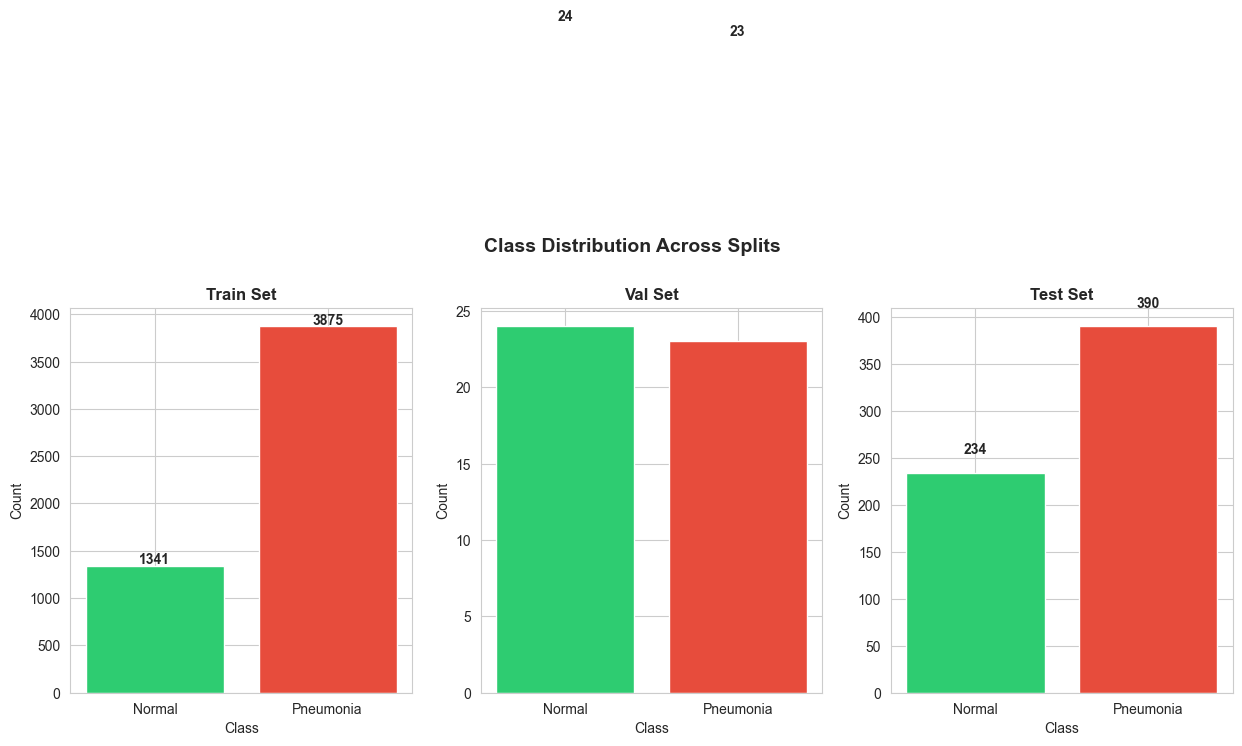


✓ Class distribution plot saved as 'class_distribution.png'


In [2]:
# Class distribution per split
print("="*60)
print("CLASS DISTRIBUTION")
print("="*60)

for split in ['train', 'val', 'test']:
    split_data = df[df['Split'] == split]
    print(f"\n{split.upper()}:")
    for _, row in split_data.iterrows():
        total = split_data['Count'].sum()
        percentage = (row['Count'] / total) * 100
        print(f"  {row['Class']}: {row['Count']} ({percentage:.1f}%)")

# Visualize distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, split in enumerate(['train', 'val', 'test']):
    split_data = df[df['Split'] == split]
    axes[idx].bar(split_data['Class'], split_data['Count'], color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'{split.capitalize()} Set', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Count')
    axes[idx].set_xlabel('Class')
    for i, v in enumerate(split_data['Count']):
        axes[idx].text(i, v + 20, str(v), ha='center', fontweight='bold')

plt.suptitle('Class Distribution Across Splits', fontsize=14, fontweight='bold', y=1.02)
plt.savefig('class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Class distribution plot saved as 'class_distribution.png'")

## Image Properties Analysis

Analyze image dimensions, aspect ratios, and other properties from a sample of training images.

In [3]:
from PIL import Image

print("="*60)
print("IMAGE PROPERTIES ANALYSIS")
print("="*60)

# Sample images for analysis
sample_size = 100
image_properties = {'widths': [], 'heights': [], 'aspects': []}

for split in ['train']:
    for class_name in CLASS_NAMES:
        class_path = os.path.join(DATASET_PATH, split, class_name)
        images = [f for f in os.listdir(class_path) if f.endswith(('.jpeg', '.jpg', '.png'))]
        sampled = random.sample(images, min(sample_size, len(images)))
        
        for img_name in sampled:
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path)
            w, h = img.size
            image_properties['widths'].append(w)
            image_properties['heights'].append(h)
            image_properties['aspects'].append(w/h)

print(f"Analyzed {len(image_properties['widths'])} images\n")
print(f"Width  - Min: {min(image_properties['widths'])}, Max: {max(image_properties['widths'])}, Mean: {np.mean(image_properties['widths']):.1f}")
print(f"Height - Min: {min(image_properties['heights'])}, Max: {max(image_properties['heights'])}, Mean: {np.mean(image_properties['heights']):.1f}")
print(f"Aspect - Min: {min(image_properties['aspects']):.2f}, Max: {max(image_properties['aspects']):.2f}, Mean: {np.mean(image_properties['aspects']):.2f}")

print("\n✓ Image properties analyzed")

IMAGE PROPERTIES ANALYSIS
Analyzed 200 images

Width  - Min: 457, Max: 2450, Mean: 1418.0
Height - Min: 295, Max: 2325, Mean: 1083.6
Aspect - Min: 0.93, Max: 2.13, Mean: 1.37

✓ Image properties analyzed


## Sample Images Visualization

Visualize sample chest X-rays from both Normal and Pneumonia classes.

SAMPLE IMAGES VISUALIZATION


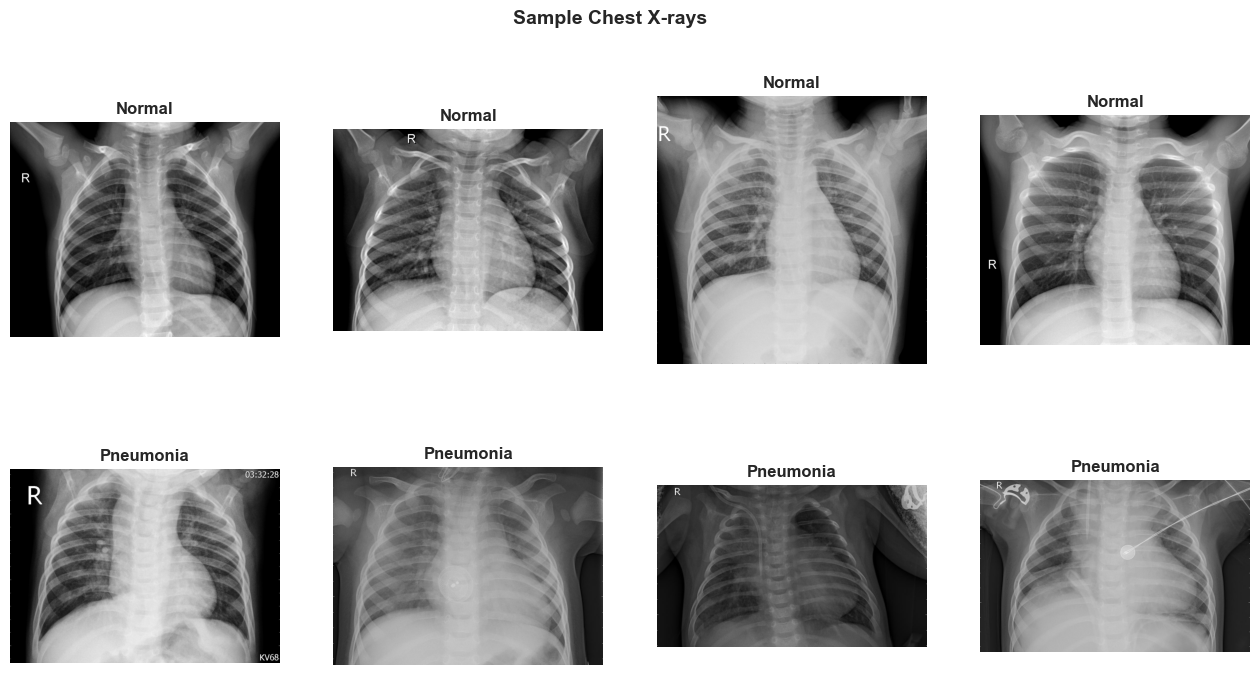


✓ Sample images saved as 'sample_images.png'


In [4]:
print("="*60)
print("SAMPLE IMAGES VISUALIZATION")
print("="*60)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for class_idx, class_name in enumerate(CLASS_NAMES):
    class_path = os.path.join(DATASET_PATH, 'train', class_name)
    images = [f for f in os.listdir(class_path) if f.endswith(('.jpeg', '.jpg', '.png'))]
    samples = random.sample(images, 4)
    
    for img_idx, img_name in enumerate(samples):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path).convert('RGB')
        
        axes[class_idx, img_idx].imshow(img, cmap='gray')
        axes[class_idx, img_idx].set_title(f'{class_name}', fontweight='bold')
        axes[class_idx, img_idx].axis('off')

plt.suptitle('Sample Chest X-rays', fontsize=14, fontweight='bold')
plt.savefig('sample_images.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Sample images saved as 'sample_images.png'")

## EDA Summary

Summary of key findings from the exploratory data analysis.

In [5]:
print("="*60)
print("KEY FINDINGS")
print("="*60)
print("\n📊 Class Distribution:")
print("  • Training set: 74.3% Pneumonia, 25.7% Normal (IMBALANCED)")
print("  • Validation set: 51.1% Normal, 48.9% Pneumonia (BALANCED)")
print("  • Test set: 62.5% Pneumonia, 37.5% Normal (IMBALANCED)")

print("\n📏 Image Properties:")
print("  • Variable dimensions: 457-2450px width, 295-2325px height")
print("  • Mean size: 1418 x 1084 pixels")
print("  • Aspect ratios: 0.93 to 2.13 (variable)")

print("\n⚠️ Important Considerations:")
print("  • Class imbalance requires weighted loss or resampling")
print("  • Small validation set (47 images) - may need k-fold CV")
print("  • Variable image sizes require resizing to fixed dimensions")
print("  • Medical imaging - careful with augmentations")

print("\n✅ Next Steps:")
print("  1. Implement class weights for imbalanced training")
print("  2. Resize all images to 224x224 for model input")
print("  3. Apply medical-appropriate augmentations")
print("  4. Use ImageNet normalization for transfer learning")

print("\n" + "="*60)
print("NOTEBOOK 2 COMPLETE - data_eda.ipynb")
print("="*60)
print("Next: Create 'preprocessing.ipynb' for data pipeline")

KEY FINDINGS

📊 Class Distribution:
  • Training set: 74.3% Pneumonia, 25.7% Normal (IMBALANCED)
  • Validation set: 51.1% Normal, 48.9% Pneumonia (BALANCED)
  • Test set: 62.5% Pneumonia, 37.5% Normal (IMBALANCED)

📏 Image Properties:
  • Variable dimensions: 457-2450px width, 295-2325px height
  • Mean size: 1418 x 1084 pixels
  • Aspect ratios: 0.93 to 2.13 (variable)

⚠️ Important Considerations:
  • Class imbalance requires weighted loss or resampling
  • Small validation set (47 images) - may need k-fold CV
  • Variable image sizes require resizing to fixed dimensions
  • Medical imaging - careful with augmentations

✅ Next Steps:
  1. Implement class weights for imbalanced training
  2. Resize all images to 224x224 for model input
  3. Apply medical-appropriate augmentations
  4. Use ImageNet normalization for transfer learning

NOTEBOOK 2 COMPLETE - data_eda.ipynb
Next: Create 'preprocessing.ipynb' for data pipeline
